<a href="https://colab.research.google.com/github/rasathuraikaran/e18-4yp-machine-vision-for-quality-inspection/blob/main/ImageRegistrationCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image loaded successfully.
Image loaded successfully.


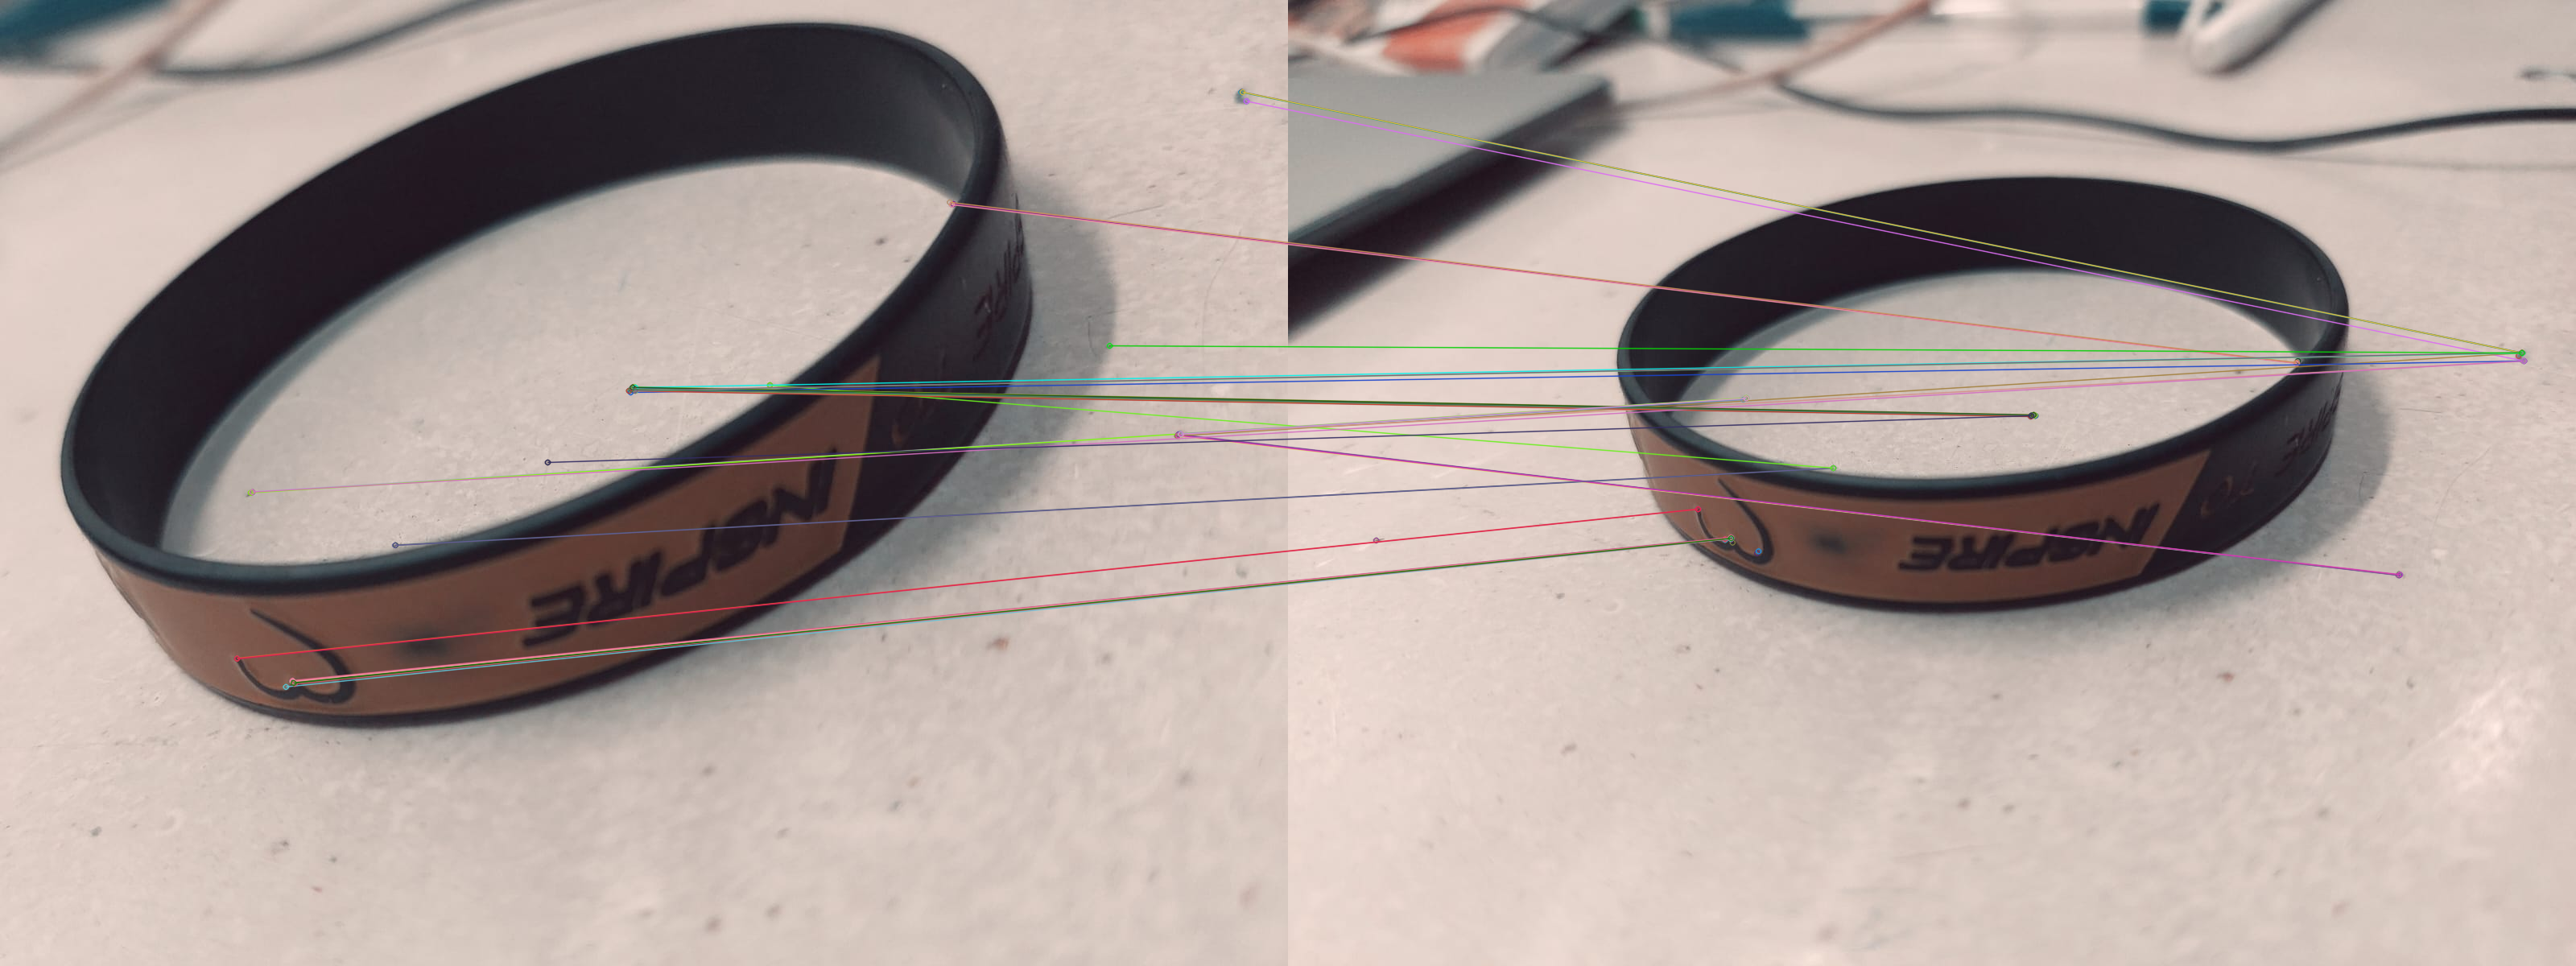

Estimated homography : 
 [[ 6.67589512e-01 -2.45763660e-01  5.07904256e+02]
 [ 2.23680218e-01  6.70802990e-01  1.01514384e+01]
 [-9.18447951e-06 -1.15094472e-05  1.00000000e+00]]


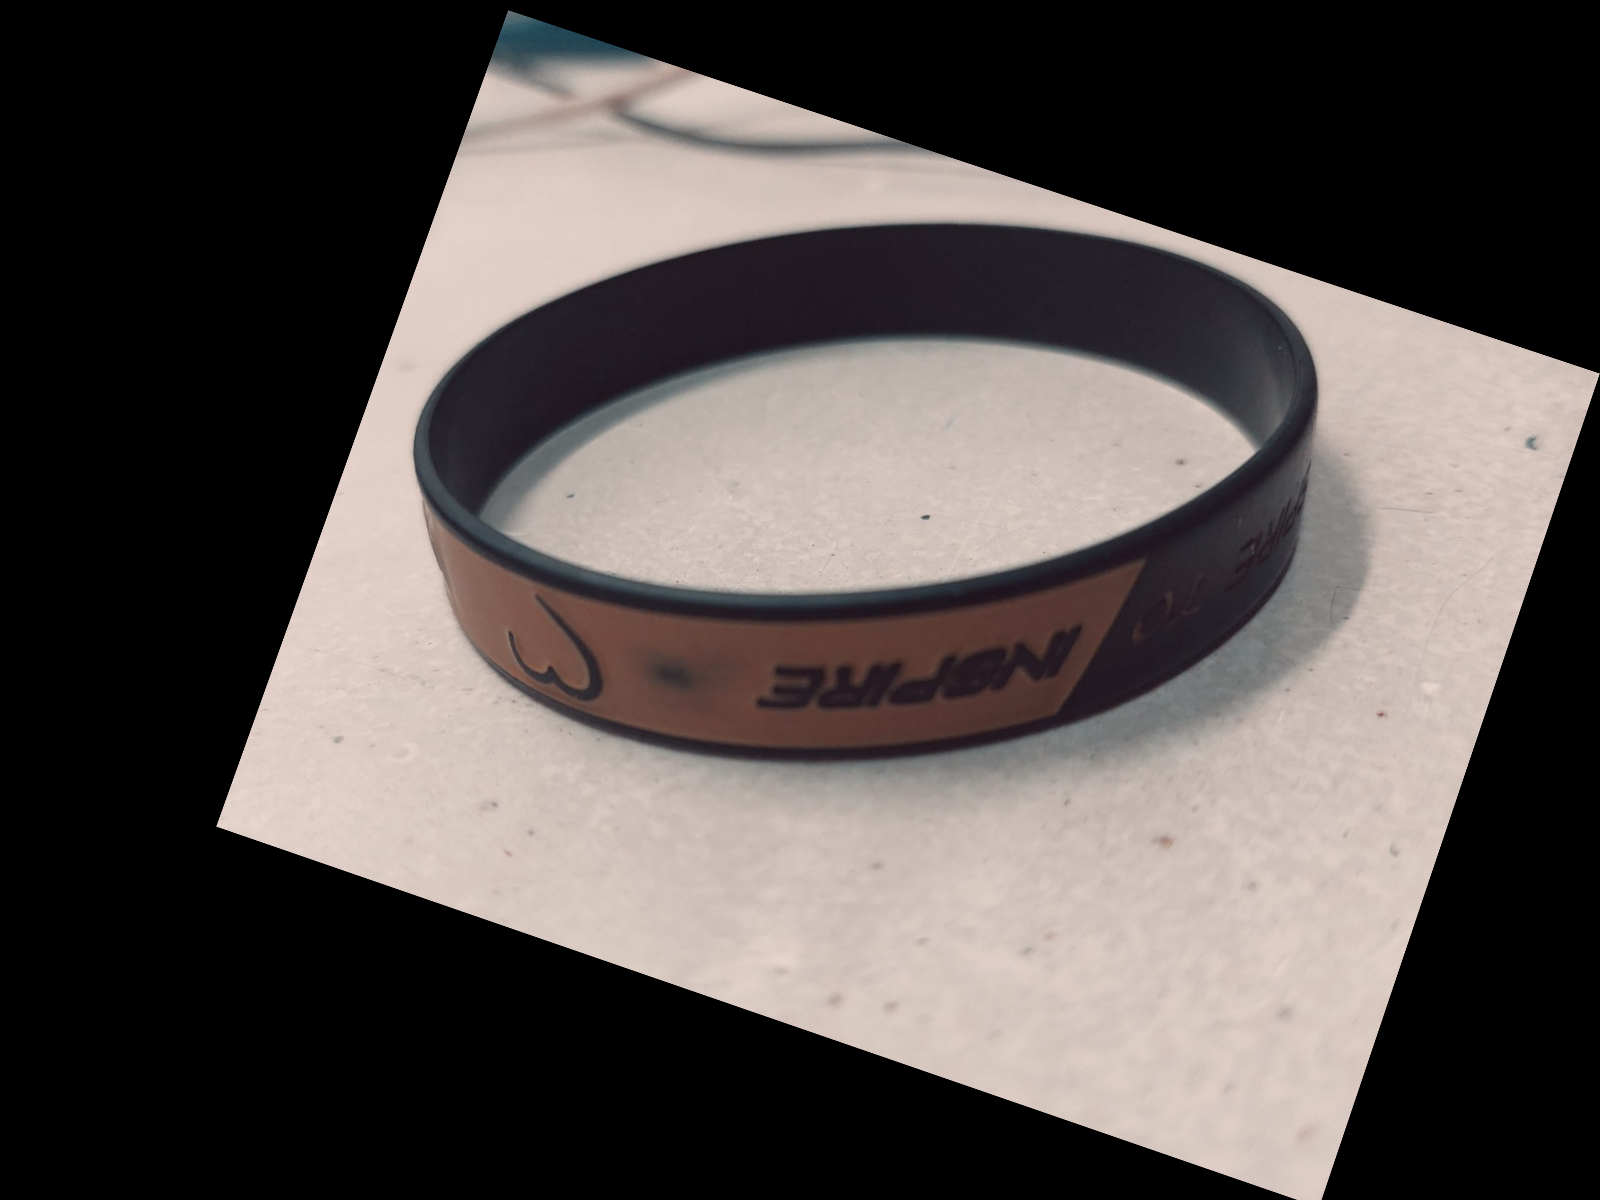

-1

In [14]:
#!/usr/bin/env python
__author__ = "Sreenivas Bhattiprolu"
__license__ = "Feel free to copy, I appreciate if you acknowledge Python for Microscopists"

# https://www.youtube.com/watch?v=cA8K8dl-E6k


# Brute-Force Matching with ORB Descriptors

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

im1 = cv2.imread('train2.jpeg')  # Image that needs to be registered.
im2 = cv2.imread('train1.jpeg')  # trainImage
# Check if the image was loaded successfully
if im1 is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")
if im2 is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")
img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create(50)  # Registration works with at least 50 points

# find the keypoints and descriptors with orb
kp1, des1 = orb.detectAndCompute(img1, None)  # kp1 --> list of keypoints
kp2, des2 = orb.detectAndCompute(img2, None)

# Brute-Force matcher takes the descriptor of one feature in first set and is
# matched with all other features in second set using some distance calculation.
# create Matcher object

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Match descriptors.
matches = matcher.match(des1, des2, None)  # Creates a list of all matches, just like keypoints

# Sort them in the order of their distance.
matches = sorted(matches, key=lambda x: x.distance)

# Like we used cv2.drawKeypoints() to draw keypoints,
# cv2.drawMatches() helps us to draw the matches.
# https://docs.opencv.org/3.0-beta/modules/features2d/doc/drawing_function_of_keypoints_and_matches.html
# Draw first 10 matches.
img3 = cv2.drawMatches(im1, kp1, im2, kp2, matches[:50], None)

cv2_imshow( img3)


# Now let us use these key points to register two images.
# Can be used for distortion correction or alignment
# For this task we will use homography.
# https://docs.opencv.org/3.4.1/d9/dab/tutorial_homography.html

# Extract location of good matches.
# For this we will use RANSAC.
# RANSAC is abbreviation of RANdom SAmple Consensus,
# in summary it can be considered as outlier rejection method for keypoints.
# http://eric-yuan.me/ransac/
# RANSAC needs all key points indexed, first set indexed to queryIdx
# Second set to #trainIdx.

points1 = np.zeros((len(matches), 2), dtype=np.float32)  # Prints empty array of size equal to (matches, 2)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt  # gives index of the descriptor in the list of query descriptors
    points2[i, :] = kp2[match.trainIdx].pt  # gives index of the descriptor in the list of train descriptors

# Now we have all good keypoints so we are ready for homography.
# Find homography
# https://en.wikipedia.org/wiki/Homography_(computer_vision)

h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

# Use homography
height, width, channels = im2.shape
im1Reg = cv2.warpPerspective(im1, h, (width, height))  # Applies a perspective transformation to an image.

print("Estimated homography : \n", h)

cv2_imshow( im1Reg)
cv2.waitKey()